In [16]:
import pickle
from pprint import pp


import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import MaxNLocator

from collections import OrderedDict

In [17]:
def calc_remembering(acc_1: float, acc_2: float) -> float:
    return 1 - acc_1/acc_2

def calc_forgetting(acc_1: float, acc_2: float) -> float:
    return acc_1/acc_2

def calc_forward_transfer(acc_gate: float, acc_expert: float) -> float:
    return acc_gate - acc_expert

In [18]:
path_to_data = "/home/users/MTrappett/mtrl/BranchGatingProject/branchNetwork/data/results/demo_CL_metrics_results.pkl"

with open(path_to_data, 'rb') as f:
    data = pickle.load(f)

In [19]:
pp(data)

[{'model_name': 'ExpertModel',
  'data': OrderedDict([('model_name', 'ExpertModel'),
                       ('Training_Loss',
                        [0.022015862571545683,
                         0.021002579420900194,
                         0.01345670756440574,
                         0.010759730308581465,
                         0.007646673974899439,
                         0.005509857457285872,
                         0.004487017853953206,
                         0.004603631389788546,
                         0.0036170999653423177,
                         0.0024603085872083427,
                         0.021749148353601037,
                         0.02054164661005282,
                         0.013739484948472092,
                         0.00964819013881988,
                         0.0072807821983727405,
                         0.005614966249313598,
                         0.005283455022226888,
                         0.0029709603839788955,
                         0.

In [20]:
def make_results_dict(results):
    results_dictionary = dict()
    for result in results:
        results_dictionary[result['model_name']] = result['data']
    # plot_results(results_dictionary)
    return results_dictionary
    
def make_plot(results_dictionary: dict[str, OrderedDict], subfig_labels: list, results_indices: list, title: str, save_str: str, yaxis_label: str='Loss'):
    fig, axs = plt.subplots(len(subfig_labels), 1, figsize=(10, 8), sharex=True, layout="constrained")
    colors ={model_name:color for model_name, color in zip(results_dictionary.keys(), ['blue', 'orange', 'green', 'red'])}
    
    for j, (i, ax) in enumerate(zip(results_indices, axs)):
        for results in results_dictionary.values():
            ax.plot(np.array(list(results.values())[i]), 
                    label=list(results.values())[0], 
                    color=colors[list(results.values())[0]], 
                    linewidth=2)
        
        # Removing the red rectangle by not adding it this time
        ax.grid(True)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
        # ax.set_yticks([0, 1]) 
        
        # Adding vertical bars
        half_of_data = len(list(results.values())[i])/2 - 0.5
        # print(half_of_data)
        ax.axvline(x=half_of_data, color='grey', linestyle='--', linewidth=2)
        # ax.axvline(x=2*half_of_data, color='grey', linestyle='--', linewidth=2)
        
        # Setting larger labels
        # ax.set_ylabel(yaxis_label, fontsize=14)

        # Placing larger, bold text aligned with each subplot on the y-axis
        fig.text(-.07, 0.5-(i*0.01), subfig_labels[j], fontsize=12, fontweight='bold',
                verticalalignment='center', horizontalalignment='right', transform=ax.transAxes)

    # Setting the x-axis label only once, with a larger font size
    axs[-1].set_xlabel('Epochs', fontsize=14)

    # Adding a legend
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')

    # Adding an overall figure title, a bit larger
    fig.suptitle(title, fontsize=16, fontweight='bold', y=1.02)
    # plt.savefig(f'/home/users/MTrappett/mtrl/BranchGatingProject/data/plots/{save_str}.png', bbox_inches='tight')
      
      
      
def plot_results(results_dictionary: dict[str, OrderedDict]):
    '''results dictionary will have keys of model name and values of Ordereddict with element:
    ['model_name',
    'Training_Loss', 
    f'd{degrees[0]}_loss', 
    f'd{degrees[1]}_loss',
    f'd{degrees[0]}_Accuracy',
    f'd{degrees[1]}_Accuracy',]
    '''
    
    subfig_labels = ['Training Loss',
                    'Validation Loss for Task 1', 
                    'Validation Loss for Task 2',]
    results_indices = [1,2,4]
    make_plot(results_dictionary, subfig_labels, results_indices, 'Comparison of all losses during training and evaluation', 'loss_plot', 'Loss')
    
    subfig_labels = ['Training Loss',
                    'Validation Accuracy for Task 1', 
                    'Validation Accuracy for Task 2']
    results_indices = [1,3,5]
    make_plot(results_dictionary, subfig_labels, results_indices,'Comparison of evaluation accuracy after training', 'accuracy_plot', 'Accuracy')

In [21]:
data_dict = make_results_dict(data) 
print(len(data_dict.values()))

1


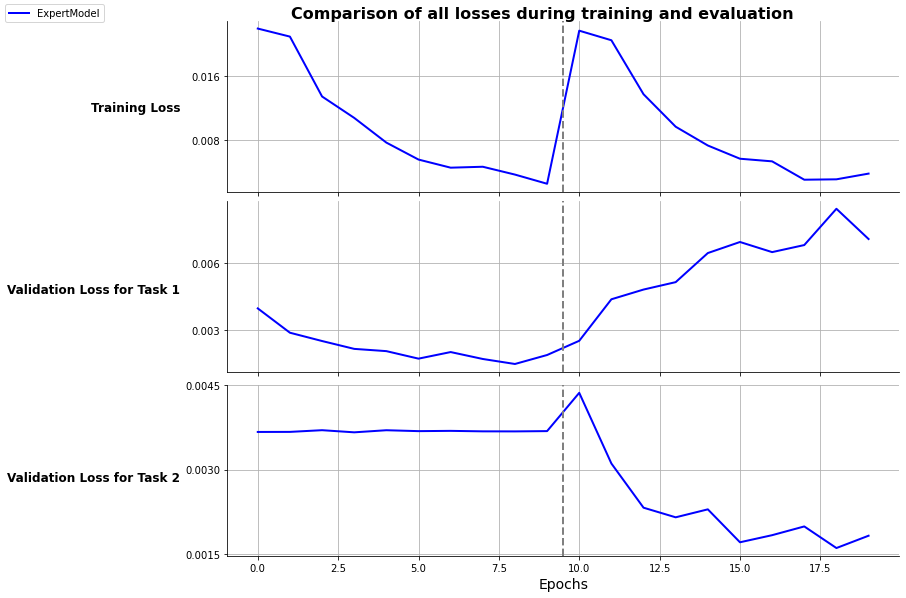

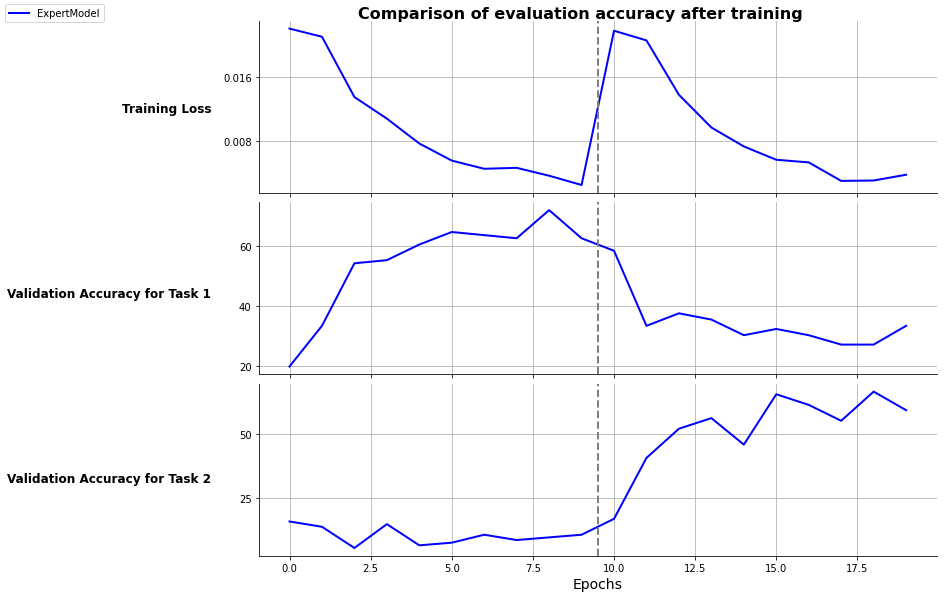

In [22]:
plot_results(data_dict)

In [23]:
print(data_dict.keys())

dict_keys(['ExpertModel'])


In [24]:
expert_data = data_dict['ExpertModel']
gate_data = data_dict['BranchModel']

KeyError: 'BranchModel'

In [ ]:
expert_data.keys()

expert_accuracys = {k:expert_data[k] for k in ('d0_Accuracy', 'd180_Accuracy')}
gate_accuracys = {k:gate_data[k] for k in ('d0_Accuracy', 'd180_Accuracy')}

In [ ]:
expert_accuracys

{'d0_Accuracy': [9.375,
  39.583333333333336,
  46.875,
  53.125,
  61.458333333333336,
  63.541666666666664,
  71.875,
  62.5,
  61.458333333333336,
  75.0,
  59.375,
  47.916666666666664,
  40.625,
  44.791666666666664,
  34.375,
  30.208333333333332,
  30.208333333333332,
  29.166666666666668,
  32.291666666666664,
  31.25],
 'd180_Accuracy': [7.291666666666667,
  13.541666666666666,
  9.375,
  3.125,
  3.125,
  9.375,
  5.208333333333333,
  14.583333333333334,
  8.333333333333334,
  6.25,
  14.583333333333334,
  34.375,
  59.375,
  60.416666666666664,
  57.291666666666664,
  55.208333333333336,
  67.70833333333333,
  61.458333333333336,
  65.625,
  63.541666666666664]}

In [ ]:
last_task_1_acc_index = int(len(gate_accuracys['d0_Accuracy'])/2) - 1
last_task_2_acc_index = len(gate_accuracys['d180_Accuracy']) - 1


In [ ]:
forget_val = calc_forgetting(gate_accuracys['d0_Accuracy'][last_task_1_acc_index], gate_accuracys['d0_Accuracy'][last_task_2_acc_index])
remem_val = calc_remembering(gate_accuracys['d0_Accuracy'][last_task_1_acc_index], gate_accuracys['d0_Accuracy'][last_task_2_acc_index])
forward_val = calc_forward_transfer(gate_accuracys['d180_Accuracy'][last_task_2_acc_index], expert_accuracys['d180_Accuracy'][last_task_2_acc_index])

In [ ]:
pp(gate_accuracys)
pp(expert_accuracys)

{'d0_Accuracy': [20.833333333333332,
                 29.166666666666668,
                 25.0,
                 50.0,
                 40.625,
                 48.958333333333336,
                 56.25,
                 42.708333333333336,
                 64.58333333333333,
                 67.70833333333333,
                 65.625,
                 58.333333333333336,
                 58.333333333333336,
                 57.291666666666664,
                 60.416666666666664,
                 55.208333333333336,
                 56.25,
                 59.375,
                 51.041666666666664,
                 65.625],
 'd180_Accuracy': [17.708333333333332,
                   11.458333333333334,
                   13.541666666666666,
                   22.916666666666668,
                   25.0,
                   27.083333333333332,
                   25.0,
                   16.666666666666668,
                   14.583333333333334,
                   17.708333333333332,
 

In [ ]:
print(f'Forgetting: {forget_val}')
print(f'Remembering: {remem_val}')
print(f'Forward Transfer: {forward_val}')

Forgetting: 1.0317460317460316
Remembering: -0.03174603174603163
Forward Transfer: 2.0833333333333357
